In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

In [6]:
batch_size = 8
learning_rate = 0.002
num_epochs = 800

In [7]:
normal_dir = 'C:\\Users\\WorkStation\\Desktop\\CAE_dataset\\normal'
abnormal_dir = 'C:\\Users\\WorkStation\\Desktop\\CAE_dataset\\abnormal3'

normal_set = datasets.ImageFolder(
    normal_dir,
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_set = datasets.ImageFolder(
    abnormal_dir,
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_set, test_set = torch.utils.data.random_split(normal_set, [len(normal_set) - 50, 50])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,shuffle=True)
normal_loader = torch.utils.data.DataLoader(normal_set, batch_size=batch_size, shuffle=True)
abnormal_loader = torch.utils.data.DataLoader(abnormal_set, batch_size=batch_size,shuffle=True)

In [8]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        # Encoder
        self.cnn_layer1 = nn.Sequential(
                        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),
                         nn.MaxPool2d(2,2))

        self.cnn_layer2 = nn.Sequential(
                                nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))
        
        self.cnn_layer3 = nn.Sequential(
                                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))

        # Decoder        
        self.tran_cnn_layer1 = nn.Sequential(
                        nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())
        
        self.tran_cnn_layer2 = nn.Sequential(
                        nn.ConvTranspose2d(32, 16, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())

        self.tran_cnn_layer3 = nn.Sequential(
                        nn.ConvTranspose2d(16, 3, kernel_size = 2, stride = 2, padding=0),
                        nn.Sigmoid())
            
            
    def forward(self, x):
        output = self.cnn_layer1(x)
        output = self.cnn_layer2(output)
        output = self.cnn_layer3(output)        
        output = self.tran_cnn_layer1(output)
        output = self.tran_cnn_layer2(output)
        output = self.tran_cnn_layer3(output)

        return output

In [9]:
model = ConvAutoEncoder()
model.load_state_dict(torch.load('best_model_final.pth'))
criterion = nn.MSELoss()

In [13]:
threshold = np.arange(0.0005, 0.003, 0.00001)

err_rate = []
acc_rate = []

best_err = 1.0
best_accuracy = 0.0
best_threshold = {"threshold":[], "err":[]}

for t in threshold:
    print('========== threshold = %.5f ==========' %(t))
    
    model.eval()
    correct_num = 0.0
    best_accuracy = 0.0
    normal_err = 0
    abnormal_err = 0
    
    for i, (X_normal, _) in enumerate(normal_loader):
        output = model(X_normal)
        loss = criterion(X_normal, output)
        
        if loss.item() > t:
            normal_err += 1
            
    print('normal error rate : %.5f' %(normal_err/len(normal_loader)))
    
        
    for i, (X_abnormal, _) in enumerate(abnormal_loader):
        output = model(X_abnormal)
        loss = criterion(X_abnormal, output)
        
        if loss.item() < t:
            abnormal_err += 1
            
    print('abnormal error rate : %.5f ' %(abnormal_err/len(abnormal_loader)))
      
    err = ((normal_err/len(normal_loader)) + (abnormal_err/len(abnormal_loader)))/2.0
    acc = 1-err*2.0
    err_rate.append(err)
    acc_rate.append(acc)
    print('avg error rate : %.5f' %(err))
    print('accuracy : %.4f' %(acc*100),'%')
    
    if err < best_err:
        best_threshold["threshold"].append(t)
        best_threshold["err"].append(err)

========== threshold = 0.00050 ==========
normal error rate : 1.00000
abnormal error rate : 0.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00051 ==========
normal error rate : 1.00000
abnormal error rate : 0.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00052 ==========
normal error rate : 1.00000
abnormal error rate : 0.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00053 ==========
normal error rate : 1.00000
abnormal error rate : 0.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00054 ==========
normal error rate : 1.00000
abnormal error rate : 0.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00055 ==========
normal error rate : 1.00000
abnormal error rate : 0.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00056 ==========
normal error rate : 1.00000
abnormal error rate : 0.00000 
avg error rate : 0.5000

normal error rate : 0.00000
abnormal error rate : 0.00000 
avg error rate : 0.00000
accuracy : 100.0000 %
========== threshold = 0.00107 ==========
normal error rate : 0.00000
abnormal error rate : 0.00000 
avg error rate : 0.00000
accuracy : 100.0000 %
========== threshold = 0.00108 ==========
normal error rate : 0.00000
abnormal error rate : 0.00000 
avg error rate : 0.00000
accuracy : 100.0000 %
========== threshold = 0.00109 ==========
normal error rate : 0.00000
abnormal error rate : 0.00000 
avg error rate : 0.00000
accuracy : 100.0000 %
========== threshold = 0.00110 ==========
normal error rate : 0.00000
abnormal error rate : 0.00000 
avg error rate : 0.00000
accuracy : 100.0000 %
========== threshold = 0.00111 ==========
normal error rate : 0.00000
abnormal error rate : 0.00000 
avg error rate : 0.00000
accuracy : 100.0000 %
========== threshold = 0.00112 ==========
normal error rate : 0.00000
abnormal error rate : 0.00000 
avg error rate : 0.00000
accuracy : 100.0000 %
======

normal error rate : 0.00000
abnormal error rate : 0.83957 
avg error rate : 0.41979
accuracy : 16.0428 %
========== threshold = 0.00163 ==========
normal error rate : 0.00000
abnormal error rate : 0.84759 
avg error rate : 0.42380
accuracy : 15.2406 %
========== threshold = 0.00164 ==========
normal error rate : 0.00000
abnormal error rate : 0.83957 
avg error rate : 0.41979
accuracy : 16.0428 %
========== threshold = 0.00165 ==========
normal error rate : 0.00000
abnormal error rate : 0.85294 
avg error rate : 0.42647
accuracy : 14.7059 %
========== threshold = 0.00166 ==========
normal error rate : 0.00000
abnormal error rate : 0.85027 
avg error rate : 0.42513
accuracy : 14.9733 %
========== threshold = 0.00167 ==========
normal error rate : 0.00000
abnormal error rate : 0.85027 
avg error rate : 0.42513
accuracy : 14.9733 %
========== threshold = 0.00168 ==========
normal error rate : 0.00000
abnormal error rate : 0.83957 
avg error rate : 0.41979
accuracy : 16.0428 %
========== th

abnormal error rate : 0.98930 
avg error rate : 0.49465
accuracy : 1.0695 %
========== threshold = 0.00219 ==========
normal error rate : 0.00000
abnormal error rate : 0.99198 
avg error rate : 0.49599
accuracy : 0.8021 %
========== threshold = 0.00220 ==========
normal error rate : 0.00000
abnormal error rate : 0.99465 
avg error rate : 0.49733
accuracy : 0.5348 %
========== threshold = 0.00221 ==========
normal error rate : 0.00000
abnormal error rate : 0.99198 
avg error rate : 0.49599
accuracy : 0.8021 %
========== threshold = 0.00222 ==========
normal error rate : 0.00000
abnormal error rate : 0.99198 
avg error rate : 0.49599
accuracy : 0.8021 %
========== threshold = 0.00223 ==========
normal error rate : 0.00000
abnormal error rate : 0.99198 
avg error rate : 0.49599
accuracy : 0.8021 %
========== threshold = 0.00224 ==========
normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00225 ==========
normal

normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00276 ==========
normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00277 ==========
normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00278 ==========
normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00279 ==========
normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00280 ==========
normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold = 0.00281 ==========
normal error rate : 0.00000
abnormal error rate : 1.00000 
avg error rate : 0.50000
accuracy : 0.0000 %
========== threshold

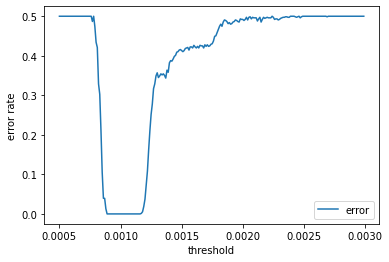

In [14]:
plt.xlabel('threshold')
plt.ylabel('error rate')
plt.plot(threshold, err_rate, label = 'error')
plt.legend()
plt.show()

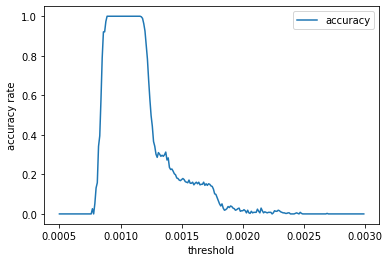

In [15]:
plt.xlabel('threshold')
plt.ylabel('accuracy rate')
plt.plot(threshold, acc_rate, label = 'accuracy')
plt.legend()
plt.show()